# Capstone Telegram Chatbot

This notebook is used to guide you in working on building the Telegram chatbot apps for Algoritma Academy Data Analytics Specialization Capstone Project.

**MAIN GOAL:** Create a bot that can provide report on Facebook daily ads for different marketing campaign. Here is an example: http://t.me/capstone_da_bot

![](assets/readme/telegram-bot.png)

---

There are several conventions we used in this notebook:

- **TO DO** = Section need to be completed
- **EXPECTED OUTPUT** = Reference output for coding section
- **CHECKPOINT** = Review and continue your coding in the Python script file `.py`
- **NOTE** = Additional information that is important for you to know

# Setup

## Virtual Environment

There are few prerequisites needed for this project. First, you will need to prepare a new `conda` environment installed with all package dependencies. 

**TO DO:**

Please follow through with the following command to create a new `conda` environment and install the dependencies:

1. Create a new `conda` environment named **capstone-telebot** using Python version 3.10 and activate it:
    ```
    conda create -n capstone-telebot python=3.10
    conda activate capstone-telebot
    ```

2. Since it is beneficial for us to create a draft using Jupyter Notebook, let's also create an IPython Kernel using the following command:
    ```
    pip install ipykernel
    python -m ipykernel install --user --name=capstone-telebot
    ```

3. Change the directory of your terminal (or Anaconda Prompt) to the downloaded repository:
    ```
    cd <PATH_TO_FOLDER>
    ```

    Example: `cd C:\Users\USER\Desktop\Algoritma\telebot-master`

4. Install the dependencies:
    ```
    pip install -r requirements.txt
    ```

    If you encounter error during installation, make sure you have a stable connection and turn off your firewall during installation. 

## Telegram Bot API

**API** stands for *Application Programming Interface*. It is a set of functions and procedures that allow for the creation of applications that access data and features of other applications, services, or operating systems. 

Telegram allows user to connect bots to their system by providing **Telegram Bot API**. Even better, to create bots in Telegram, you're not required set up the API connection manually. All you need to do is to talk to [BotFather](https://t.me/botfather), a bot provided by Telegram to help their users to create new bots or change the bots settings.

**TO DO:**

To get started, make sure you have registered a Telegram account from your mobile phone (you can't create new Telegram account through its desktop app). Once you've registered, you can access its desktop app through  https://web.telegram.org/ and follow the steps below:

1. Start a chat with [BotFather](https://t.me/botfather)
2. Use the **/newbot** command to create a new bot. The BotFather will ask you for a name and username. For the username, make sure you follow this format: **DACP\_(BATCH)_(NAME)_BOT** e.g. DACP_PHOENIX_TOMY_BOT.
3. Once you've completed, BotFather will generate an authorization token for your new bot. **NOTE:** Please do treat your token as your personal password, keep it secure by not sharing it to another person.
4. Optionally, you can set your bot information using the following commands:
    - **/setdescription** - change bot description
    - **/setabouttext** - change bot about info
    - **/setuserpic** - change bot profile photo

## Store Your Token Securely

The program will later need to access Telegram bot API via token. Usually we store a value as a variable explicitly, for example: `variable = "value"`. 

**TO DO:**

To avoid the token being hardcoded and exposed to the public, you are required to create an environment variable called `TOKEN`:

1. Inside the project folder, create a new file named `.env`
2. Open the `.env` file using any kind of text editor application, such as notepad
3. Paste your API token inside and assign it to `TOKEN`

    ```
    TOKEN = "PASTE_YOUR_TOKEN_HERE"
    ```

4. Use the following code to import the `TOKEN` variable from `.env` to your Python environment.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('token.env')
TOKEN = os.environ['TOKEN']

print(f'Length of TOKEN: {len(TOKEN)} characters')   

Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 28
Python-dotenv could not parse statement starting at line 48


Length of TOKEN: 46 characters


**EXPECTED OUTPUT:**

```
Length of TOKEN: 46 characters
```

**NOTE:** Don't ever print out the `TOKEN` variable inside your notebook to avoid exposing your API token to the public.

> Package dependencies: [python-dotenv](https://pypi.org/project/python-dotenv/)

# Chatbot Functionalities

## Basic Functionalities

In this section, we are going to learn how to create a Telegram chatbot using the `pyTelegramBotAPI` package.

### Simple bot

The `TeleBot` class encapsulates all API calls in a single class. It provides functions such as `send_message`, `send_document`, and also several ways to listen for incoming messages.

In [2]:
import telebot
bot = telebot.TeleBot(TOKEN)

After defining the `bot` object, we need to register **message handlers** which define filters for a `message` must pass. If a `message` passes the filter, the function is triggered and the incoming `message` is passed as an argument.

The code below define `send_welcome` function which will be called if a user triggers the `bot` with command **/start** or **/help**. Then, `bot` responds to the incoming `message` by sending a static `"Hello World!"` text message.

**NOTE:** The function can have an arbitrary name, however, it must have only one parameter: `message`

In [3]:
@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    bot.reply_to(message, "Hello World!")

We use `.polling()` method to start the `bot`. Run the following cell code and try sending command **/start** or **/help** to your Telegram bot. The code must be running to keep the bot active. If you wish to run another cell code, please click the "⬛" button to stop the code execution.

In [4]:
# bot.polling()

All together, a simple bot may only contain several lines of code as follows:

```
import telebot
bot = telebot.TeleBot(TOKEN)

@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    bot.reply_to(message, "Hello World!")

bot.polling()
```

> Package dependencies: [pyTelegramBotAPI](https://github.com/eternnoir/pyTelegramBotAPI)

### Understanding Message Object

Of course, at this point, we are not satisfied with a simple bot that just sends static text like the one we have created above. To interact dynamically with user information, let's dive deep to understand what a `message` object is.

To make it easier for you to play around, we have pickled a `message` object namely `message_object.pkl`. It is an object of class `telebot.types.Message` which stores a lot of information from a message. Detailed description can be found on [Telegram Bot API Documentation: Message](https://core.telegram.org/bots/api#message).

In [5]:
import pickle

with open('cache/message_object.pkl', 'rb') as f:
    message = pickle.load(f)
    print(type(message)) # print object type
    print(str(message)[:1000]) # print only the first 1000 characters of message content

<class 'telebot.types.Message'>
{'content_type': 'text', 'id': 204, 'message_id': 204, 'from_user': {'id': 727286868, 'is_bot': False, 'first_name': 'Algoritma', 'username': 'AlgoCapstone', 'last_name': None, 'language_code': 'en', 'can_join_groups': None, 'can_read_all_group_messages': None, 'supports_inline_queries': None}, 'date': 1622745226, 'chat': {'id': 727286868, 'type': 'private', 'title': None, 'username': 'AlgoCapstone', 'first_name': 'Algoritma', 'last_name': None, 'photo': None, 'bio': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'permissions': None, 'slow_mode_delay': None, 'sticker_set_name': None, 'can_set_sticker_set': None, 'linked_chat_id': None, 'location': None}, 'forward_from': None, 'forward_from_chat': None, 'forward_from_message_id': None, 'forward_signature': None, 'forward_sender_name': None, 'forward_date': None, 'reply_to_message': None, 'edit_date': None, 'media_group_id': None, 'author_signature': None, 'text': '/help', 'entitie

The `message` object is similar to Python dictionary, it stores **key: value** pairs. To access a value inside `message` object, we can use a dot notation (`.`) - just like accessing an attribute. Consider the following:

```{python}
{
    'from_user': {
        'id': 727286868,
        'is_bot': False,
        'first_name': 'Algoritma',
        'username': 'AlgoCapstone',
        'last_name': None
        }
}
```

For example: let's say we want to get the username "AlgoCapstone", then we can use `message.from_user.username`

In [6]:
# play around with the message object
message.from_user.username

'AlgoCapstone'

Next, we need to extract several attributes from the `message` object:

- Attribute `chat`: Conversation the message belongs to.
- Attribute `from_user`: Detailed user information of the sender, such as `id`, `username`, `first_name`, `last_name`, etc.
- Attribute `text`: Text messages that the sender sends to the bot.

**TO DO:**

Try to create the following variables, containing the relevant information from a `message` object:

- Variable `chat_id`: contains `id` which is an unique identifier of attribute `chat`, will be used when sending a chat.
- Variable `full_name`: contains the full name (`first_name` and `last_name`) of the sender, but if the `last_name` is `None` then it only contains the `first_name`.
- Variable `message_text`: contains the `text` of the sender's message.

In [7]:
# TO DO: chat_id, full_name, message_text
chat_id = ___

first_name = ___
last_name = ___
full_name = f'{first_name} {last_name}' if last_name is not None else first_name

message_text = ___


# DO NOT EDIT (FOR CHECKING PURPOSE)
print(f"Chat ID: {chat_id}")
print(f"Sender Full Name: {full_name}")
print(f"Message: {message_text}")

Chat ID: 
Sender Full Name:  
Message: 


**EXPECTED OUTPUT**

```
Chat ID: 727286868
Sender Full Name: Algoritma
Message: /help
```

### Understanding `Template` text

A chatbot will usually reply to your message with a template text. The text can be explicitly written in script code as a string like `"Hello World!"` as we wrote earlier. When the text is too long, it is not a good practice because we have to scan through our code when we want to make a small change in the text.

A common good practice is that we prepare `.txt` file containing a template text then Python will read the file and process it as a string. The following snippet text is from `template_text/example.txt`:

```
This is an example file. You can substitute a key with a value: ${KEY}. Try to read this file using Python.
```

The syntax `${KEY}` is used to indicate which part of the text that will be substituted. The code below shows how we can read a text file, parse it into a `Template` object, and then substitute the variable with a value.

In [8]:
from string import Template

# read text from folder template_text, file example.txt
with open('template_text/example.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    temp = Template(content)
    example = temp.substitute(KEY = "The KEY will be substituted")

print(example)

This is an example file. You can substitute a key with a value: The KEY will be substituted. Try to read this file using Python.


**TO DO:**

Try to substitute `${FULL_NAME}` from `template_text/welcome.txt`. Be careful! Instead of substituting it with a static text, such as `FULL_NAME = "Algoritma"`, try substituting it with `full_name` variable that you've created in the previous section.

In [9]:
from string import Template

# TO DO: substitute text with variable
with open('template_text/welcome.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    temp = Template(content)
    welcome = temp.substitute(FULL_NAME=full_name)

print(welcome)

Hello * *, I can help you to provide a report on Facebook daily ads for different marketing campaigns.

You can control me by sending these commands:

*Main Functionality*
/summary - Generate text report for selected campaign ID
/plot - Visualize report per age group for selected campaign ID

*Information*
/help - List of available commands
/about - About me


**EXPECTED OUTPUT:**

```
Hello *Algoritma*, I can help you to provide a report on Facebook daily ads for different marketing campaigns.

You can control me by sending these commands:

*Main Functionality*
/summary - Generate text report for selected campaign ID
/plot - Visualize report per age group for selected campaign ID

*Information*
/help - List of available commands
/about - About me
```

**TO DO:**

Try to substitute the following key from `template_text/about.txt`:
- `${STUDENT_NAME}`: Your full name
- `${BATCH_ACADEMY}`: Your batch in Algoritma Academy, for example: Phoenix Day
- `${GITHUB_REPO_LINK}`: Your link to the GitHub Repository

For this section, you can substitute each key with a static text, such as `STUDENT_NAME = "Your Name"`.

In [10]:
from string import Template

# TO DO: substitute text with static values
with open('template_text/about.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    temp = Template(content)
    about = temp.substitute(
        STUDENT_NAME='Vivian',
        BATCH_ACADEMY='Wizard_da',
        GITHUB_REPO_LINK='https://github.com/hwp00462/telebot'
    )

print(about)

I was developed by *Vivian - Wizard_da* as [Algoritma Academy](https://algorit.ma/) Data Analytics Specialization capstone project.

The data is static and downloaded from [Kaggle](https://www.kaggle.com/madislemsalu/facebook-ad-campaign) provided by [Madis_Lemsalu](https://www.kaggle.com/madislemsalu).

Please find the complete script on [GitHub](https://github.com/hwp00462/telebot)


---

📍 **CHECKPOINT 1**

At this point, you have already understood how to:

- Create a simple bot, sending a static text message
- Access certain attributes of a `message` object
- Utilize `Template` object to prepare template text

Now, complete the following function inside `bot_local.py`:

- `send_welcome` will send a greeting to the sender with their full name and providing a list of available commands. This function will be triggered with **/start** or **/help** command.

![](assets/readme/start.png)

- `send_about` will send information about you as the developer. Put your name, batch name, and GitHub repository link using string. This function will be triggered with the **/about** command.

![](assets/readme/about.png)

Run your Python script and test how your Telegram bot works.

---

## Campaign Performance Reporting 

The main functionality of this bot is to provide a campaign performance report from a marketing dataset. The report will be triggered by two commands:

- **/summary**: provides quick text report of performance summary for selected campaign ID.
- **/plot**: provides an image plot representation of selected campaign ID's performance and its description via voice note.

We'll breakdown the process of each commands in the next part of this sub-section.

### Data Preparation

**TO DO:**

Let's start by reading our CSV data in. It's located in folder `data_input` and named `facebook_ads_v2.csv`. Don't forget to make sure that the value in each column has stored in the correct data type!

In [11]:
import pandas as pd

# TO DO: read data and convert data type
df = pd.read_csv('data_input/facebook_ads_v2.csv', parse_dates=True)
df.head()

,ad_id,reporting_date,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708815,30/08/2017,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
3,708818,17/08/2017,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0
4,708889,17/08/2017,916,30-34,M,15,16,17,15615.0,3,4.77,1.0,0.0


The data is downloaded from a  [Kaggle dataset repository](https://www.kaggle.com/madislemsalu/facebook-ad-campaign) provided by [Madis_Lemsalu](https://www.kaggle.com/madislemsalu). It contains daily ads report run on Facebook from different marketing campaign from 17th to 30th of August 2017. The variable includes:

- `ad_id`: Unique identifier of the daily ads
- `reporting_date`: The date of the generated report. 
- `campaign_id`: unique identifier of a campaign, one campaign could have several creative ads
- `age`: The age group on which the ad is promoted
- `gender`: The gender on which the ad is promoted
- `interest1`, `interest2`, and `interest3`: The interest group id on which the ad is promoted
- `impressions`: Number of people viewing the ad
- `clicks`: Number of people clicking the ad
- `spent`: Amount of marketing cost spent
- `total_conversion`: Number of conversions (commonly a buying action) happened
- `approved_conversion`: Number of approved conversions after cross checked with the actual business. In some cases, a conversion tracked by the ad doesn't really record with a complete buying action from the customers.

**TO DO:**

Since we expect both **/summary** & **/plot** to ask for `campaign_id` as reply options, in the cell below change the type of `campaign_id` to **string (str)** and store its unique values into `unique_campaign` variable:

In [12]:
# TO DO: get unique values of campaign_id
df['campaign_id'] = df['campaign_id'].astype('str')
unique_campaign = df['campaign_id'].unique()

unique_campaign

array(['916', '936', '1178', '1210'], dtype=object)

**EXPECTED OUTPUT:**

```
array(['916', '936', '1178', '1210'], dtype=object)
````

Be careful! Notice the following two points:

1. `dtype` of the array must be an object.
2. Each value in `unique_campaign` must be a string (denoted by single quotation mark) not an integer.
    - CORRECT OUTPUT: `['916', '936', '1178', '1210']`
    - WRONG OUTPUT: `[916, 936, 1178, 1210]`

**TO DO:** Change the data type of `ad_id`, `age`, and `gender` accordingly.

In [13]:
# TO DO: change the data type of ad_id, age, and gender
df['ad_id'] = df['ad_id'].astype('str')
df['age'] = df['age'].astype('category')
df['gender']=df['gender'].astype('category')
df['reporting_date']=pd.to_datetime(df['reporting_date'], format='%d/%m/%Y')

# check data dtypes
df.dtypes

ad_id                          object
reporting_date         datetime64[ns]
campaign_id                    object
age                          category
gender                       category
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
dtype: object

**EXPECTED OUTPUT:**

```
ad_id                          object
reporting_date         datetime64[ns]
campaign_id                    object
age                          category
gender                       category
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
dtype: object
````

Make sure you have the same data types for each column before moving on to next section.

### The `/summary` command

#### Preparing the Summary Output

This command is created to provide a quick text report of performance summary for selected campaign ID. The message template is stored on `template_text/summary.txt`.

If you open up the text file, you'll find several `${variable}`s:

- `CAMPAIGN_ID`: Selected Campaign ID
- `START_DATE` & `END_DATE`: The start and end date (`reporting_date`) of generated report 
- `TOTAL_SPENT`: Total marketing cost spent (`spent`) on the campaign  
- `TOTAL_CONVERSION`: Number of conversions (`total_conversion`) on the campaign
- `CPC`: Cost-per-click (obtained by dividing the total spent with total conversion for each campaign)

**TO DO:**

Find the range date (`start_date` and `end_date`) based on specified `campaign_id`:

1. Filter the data based on `selected_campaign_id` and then assign as `df_campaign`. Since the value of `campaign_id` will be dynamic according to user input later, for now, let's just use campaign ID `1210` as an example.
2. Get the minimum and maximum of `reporting_date` and return the date as string following the format of "17 Aug 2017". Assign as `start_date` and `end_date` respectively. Reference: [strftime cheatsheet](https://strftime.org/)

In [14]:
# TO DO: find the range date
selected_campaign_id = '1210'
df_campaign = df.assign(selected_campaign_id='1210')
        
start_date = df_campaign['reporting_date'].min().strftime(format='%d/%m/%Y')
end_date = df_campaign['reporting_date'].max().strftime(format='%d/%m/%Y')

# DO NOT EDIT (FOR CHECKING PURPOSE)
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 17/08/2017
End Date: 30/08/2017


**EXPECTED OUTPUT:**

```
Start Date: 17 Aug 2017
End Date: 30 Aug 2017
```

**TO DO:**

From the filtered data (`df_campaign`), calculate the following metrics:

1. `total_spent` is the total marketing cost spent (column `spent`) on the campaign, convert it to integer.
2. `total_conversion` is the total number of conversions (column `total_conversion`) on the campaign, convert it to integer.
3. `cpc` stands for cost-per-click, obtained by dividing the `total_spent` and `total_conversion`

In [15]:
# TO DO: perform calculation
df['total_spent'] = df['spent'].sum()
total_spent = df['total_spent'].astype(int)
total_conversion = df['total_conversion'].astype('int')
cpc = df['total_spent']/df['total_conversion']

# DO NOT EDIT (FOR CHECKING PURPOSE)
print(f"Total Spent: {total_spent}")
print(f"Total Conversion: {total_conversion}")
print(f"CPC: {cpc}")

Total Spent: 0      58705
1      58705
2      58705
3      58705
4      58705
       ...  
931    58705
932    58705
933    58705
934    58705
935    58705
Name: total_spent, Length: 936, dtype: int64
Total Conversion: 0       2
1       2
2       1
3       1
4       1
       ..
931    13
932     3
933     2
934     8
935     5
Name: total_conversion, Length: 936, dtype: int64
CPC: 0      29352.614979
1      29352.614979
2      58705.229958
3      58705.229958
4      58705.229958
           ...     
931     4515.786920
932    19568.409986
933    29352.614979
934     7338.153745
935    11741.045992
Length: 936, dtype: float64


**EXPECTED OUTPUT:**

```
Total Spent: 39084
Total Conversion: 1615
CPC: 24.20061919504644
```

In Python, there is **formatted string literals** (f-strings for short). It allows you include the value of Python expressions inside a string by prefixing the string with `f` and writing expressions as `{expression}`.

Take a look on the cell below. The syntax `f"... {...}"` indicates that we are using f-strings. Inside the curly bracket, we specify the expression as `{variable:formatting}`. The `variable` to be formatted is `example_cost`. The format `,.5f` means the following:
- `,` for thousand separator
- `.5f` for float rounding to five decimal places.

Reference: [Python 3.10 Documentation on Fancier Output Formatting](https://docs.python.org/3.10/tutorial/inputoutput.html#fancier-output-formatting)

In [16]:
# play around with f-strings
example_cost = 1234.56789123456789
f"Value of cost is {example_cost:,.5f} IDR."

'Value of cost is 1,234.56789 IDR.'

**TO DO:**

Complete the code below to read in `summary.txt` message template. It should be able to print out the template's variables filled in with the extracted information from the previous steps. Notice that you have to format `total_spent`, `total_conversion`, and `cpc` using f-strings **thousand separator** and **dollar sign**. For `cpc`, set the rounding to 1 decimal place.

In [17]:
# TO DO: substitute text with variables
with open('template_text/summary.txt', mode='r', encoding='utf-8') as f:
    content = f.read()
    
    # Convert each value in total_spent series to float and format with dollar sign and comma separator
    formatted_total_spent = "${:,.2f}".format(float(total_spent.iloc[0]))

    # Convert each value in total_conversion series to integer and format with comma separator
    formatted_total_conversion = "{:,}".format(int(total_conversion.iloc[0]))

    summary = content.format(
        CAMPAIGN_ID=df['campaign_id'].astype(str),
        START_DATE=start_date,
        END_DATE=end_date,
        TOTAL_SPENT=formatted_total_spent,
        TOTAL_CONVERSION=formatted_total_conversion,
        CPC=cpc
    )

print(summary)

Reporting Facebook ads campaign performance for Campaign ID $0       916
1       916
2       916
3       916
4       916
       ... 
931    1210
932    1210
933    1210
934    1210
935    1210
Name: campaign_id, Length: 936, dtype: object from $17/08/2017 to $30/08/2017:

Total spent: $$58,705.00 
Total conversion: $2
Cost per conversion gained: $0      29352.614979
1      29352.614979
2      58705.229958
3      58705.229958
4      58705.229958
           ...     
931     4515.786920
932    19568.409986
933    29352.614979
934     7338.153745
935    11741.045992
Length: 936, dtype: float64


**EXPECTED OUTPUT:**

```
Reporting Facebook ads campaign performance for Campaign ID 1210 from 17 Aug 2017 to 30 Aug 2017:

Total spent: $39,084 
Total conversion: 1,615
Cost per conversion gained: $24.2
```

#### Configure the Command

Let's now present our analysis result inside the Telegram Bot command. The expected flow is:

1. User trigger the command with `/summary`
2. The Bot will return a `ReplyKeyboardMarkup` which allows user to select which `campaign_id` they're interested in
3. User select a `campaign_id`
4. Bot return the campaign performance summary

To illustrate the flow, take a look at the figure below:

![](assets/summary.png)

**TO DO:**

Execute the following cell code (make sure to uncomment the `bot.polling()`) and send **/summary** command to the bot in order to understand what is `ReplyKeyboardMarkup` object and method `register_next_step_handler`.

In [18]:
import telebot
from dotenv import load_dotenv
import os

load_dotenv()
TOKEN = os.environ['TOKEN']
bot = telebot.TeleBot(TOKEN)

# FOCUS ON THIS PART
@bot.message_handler(commands=['summary'])
def ask_id_summary(message):
    chat_id = message.chat.id

    # 1. PREPARE ReplyKeyboardMarkup
    markup = telebot.types.ReplyKeyboardMarkup(one_time_keyboard=True)

    # 2. ADD BUTTON TO THE ReplyKeyboardMarkup
    markup.add('First')
    markup.add('Second')
    markup.add('Third')

    # 3. SEND MESSAGE
    sent = bot.send_message(chat_id, 'This is ask_id_summary', reply_markup=markup)

    # 4. TRIGGER send_summary FUNCTION
    bot.register_next_step_handler(sent, send_summary)

# 5. send_summary WILL BE EXECUTED
def send_summary(message):
    bot.reply_to(message, "This is send_summary function")
    print(type(message.text))

# bot.polling()

Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 28
Python-dotenv could not parse statement starting at line 48


---

📍 **CHECKPOINT 2**

At this point, you have extract relevant information and present a text report of performance summary, but only for campaign ID `1210`.

Now, complete the following function inside `bot_local.py`:

- `ask_id_summary` will prompt a keyboard and ask the user to choose campaign ID to be summarized. This function will be triggered with **/summary** command.
- `send_summary` will send a quick text report of performance summary for selected campaign ID. This function will be triggered after the user choose a campaign ID via `ask_id_summary`.

Run your Python script and test how your Telegram bot works.

---

### The `/plot` command 

Not only text messages, we can also send **image and audio output** via the Telegram bot. In this section, we want our bot to generate a plot to visualize Total Spent, Total Approved Conversion, and Average CPC (Cost per Conversion) across `age` group for selected `campaign_id`. From the visualization, there will be a voice message that summarize the insight of the plot.

#### Visualization

**TO DO:**

Let's prepare the data before visualization:

1. Filter the data based on `selected_campaign_id` and then assign as `df_campaign`. Since the value of `campaign_id` will be dynamic according to user input later, for now, let's just use campaign ID `1210` as an example.
2. By using filtered data `df_campaign`, create an aggregation table to calculate the total of `spent` and `approved_conversion` for each `age` group. Assign as `df_plot`.
3. From the aggregation table, create a new column `cpc` by dividing total `spent` by `approved_conversion`.

In [19]:
# TO DO: prepare data for visualization
selected_campaign_id = 1210

# Filter the data based on selected_campaign_id
df_campaign = df[df['campaign_id'] == selected_campaign_id]

# Print out columns of df_campaign to verify if 'age_group' is present
print(df_campaign.columns)

# Create an aggregation table to calculate total spent and approved_conversion for each age group
df_plot = df_campaign.groupby('age').agg({
    'total_spent': 'sum',
    'approved_conversion': 'sum'
}).reset_index()

# Create a new column cpc by dividing total spent by approved_conversion
df_plot['cpc'] = df_plot['total_spent'] / df_plot['approved_conversion']

print(df_plot)

Index(['ad_id', 'reporting_date', 'campaign_id', 'age', 'gender', 'interest1',
       'interest2', 'interest3', 'impressions', 'clicks', 'spent',
       'total_conversion', 'approved_conversion', 'total_spent'],
      dtype='object')
     age  total_spent  approved_conversion  cpc
0  30-34          0.0                  0.0  NaN
1  35-39          0.0                  0.0  NaN
2  40-44          0.0                  0.0  NaN
3  45-49          0.0                  0.0  NaN


**EXPECTED OUTPUT:**

|       |     spent    | approved_conversion |     cpc    |
|:-----:|:------------:|:-------------------:|:----------:|
|**age**|              |                     |            |
| 30-34 |  7559.179992 |        166.0        |  45.537229 |
| 35-39 |  5966.909990 |         78.0        |  76.498846 |
| 40-44 |  7252.099982 |         88.0        |  82.410227 |
| 45-49 | 18306.799997 |        162.0        | 113.004938 |

We are going to create bar plot of 3 values (total `spent`, `approved_conversion`, and `cpc`), so we need to use subplots for the visualization by using `plt.subplots()`. Then change the plot to frameless to make it look neater.

**TO DO:**

Complete the visual component:

1. First subplot: bar plot of total `spent` per age group. Set the `color` parameter to #AE2024 (red) and the `ylabel` accordingly.
2. Second subplot: bar plot of total `approved_conversion` per age group. Set the `color` parameter to #000000 (black) and the `ylabel` accordingly.
3. Third subplot: bar plot of average `cpc` per age group. Set the `color` parameter to #AE2024 (red) and the `ylabel` accordingly.
4. Set `xlabel` and `title` of the plot accordingly. Use the f-string formatting for `title` so that the title matches the selected `campaign_id`.

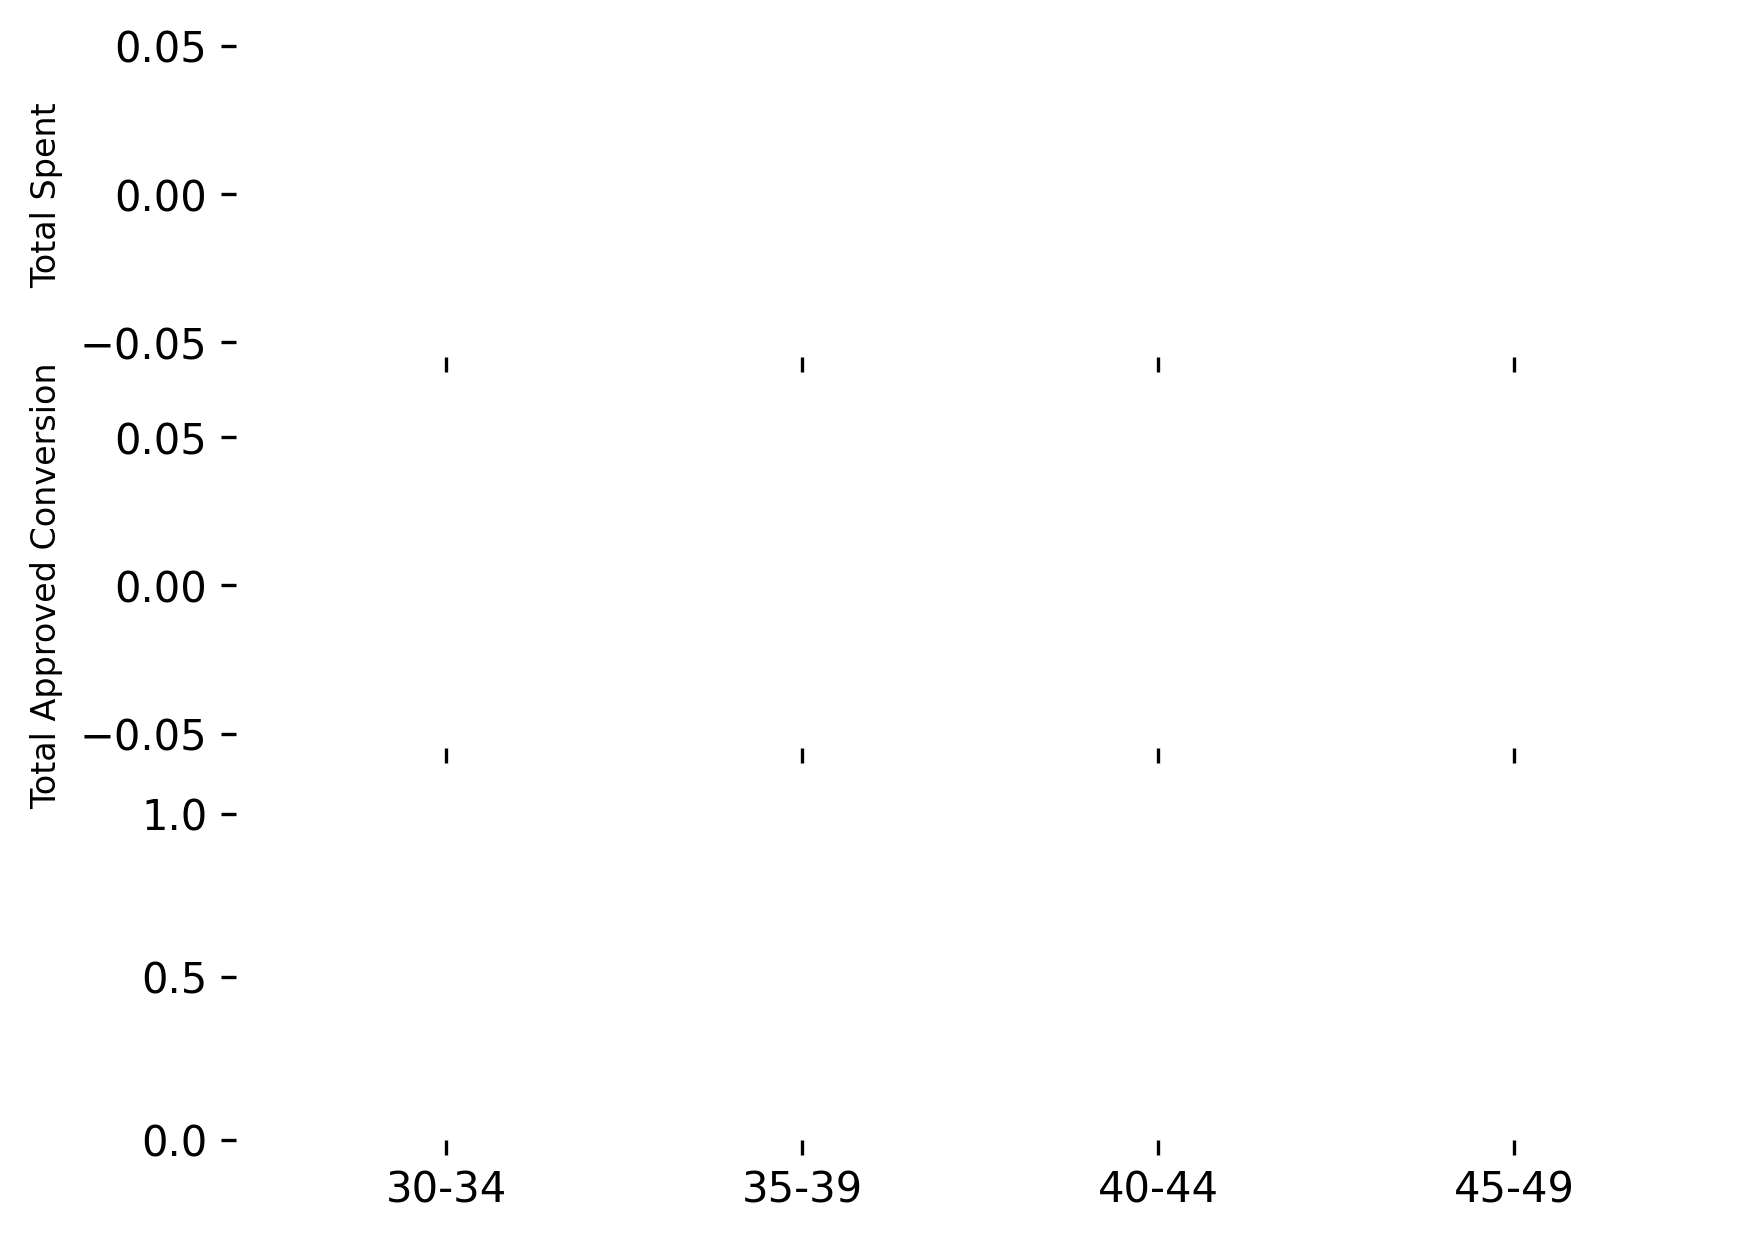

In [20]:
import matplotlib.pyplot as plt

# prepare 3 subplots vertically
fig, axes = plt.subplots(3, sharex=True, dpi=300)

# create frameless plot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# first subplot: total spent per age group
axes[0].bar(x=df_plot['age'], height=df_plot['total_spent'], color='blue')
axes[0].set_ylabel('Total Spent', fontsize=8)

# second subplot: total approved conversion per age group
axes[1].bar(x=df_plot['age'], height=df_plot['approved_conversion'], color='green')
axes[1].set_ylabel('Total Approved Conversion', fontsize=8)

# Customize plot appearance
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()

**EXPECTED OUTPUT:**

![](assets/plot.png)

The visualization above will be sent to the user as `.png` image. Therefore, we should save the plot by using `plt.savefig` method provided on the skeleton file as follow:

```py
# create output folder
if not os.path.exists('output'):
    os.makedirs('output')

# save plot
plt.savefig('output/plot.png', bbox_inches='tight')
```

---

📍 **CHECKPOINT 3**

At this point, you have created a plot but only for campaign ID `1210`.

Now, complete the following function inside `bot_local.py`:

- `ask_id_plot` will prompt a keyboard and ask the user to choose campaign ID to be summarized. This function will be triggered with **/plot** command.
- `send_plot` will send a plot for selected campaign ID. This function will be triggered after the user choose a campaign ID via `ask_id_plot`.

Run your Python script and test how your Telegram bot works.

---

#### (EXTRA CHALLENGE) Voice Message

**This section is optional and doesn't account for any score to the rubrics**. Along with the plot, we can send a voice message to user about the age group with the highest and lowest number of average CPC, total spent, and total approved conversion.

In [21]:
df_plot

,age,total_spent,approved_conversion,cpc
0,30-34,0.0,0.0,NaN
1,35-39,0.0,0.0,NaN
2,40-44,0.0,0.0,NaN
3,45-49,0.0,0.0,NaN


**TO DO:**

Using the code below, extract both minimum and maximum values of the index from the aggregation table `df_plot`. Example: for column `spent`, the age group with the lowest (minimum) values is 35-39. On the other hand, the highest (maximum) is 45-49.

In [22]:
# VOICE MESSAGE
plot_info = list(zip(
    [___, ___, ___],
    ___,
    ___))

plot_text = f'This is your requested plot for Campaign ID {selected_campaign_id}.\n'
for col, maxi, mini in plot_info:
    text = f"Age group with the highest {col} is {maxi}, while the lowest is {mini}.\n"
    plot_text += text

print(plot_text)

This is your requested plot for Campaign ID 1210.
Age group with the highest ad_id                          object
reporting_date         datetime64[ns]
campaign_id                    object
age                          category
gender                       category
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
dtype: object is object, while the lowest is object.
Age group with the highest ad_id                          object
reporting_date         datetime64[ns]
campaign_id                    object
age                          category
gender                       category
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks 

**EXPECTED OUTPUT:**

```
This is your requested plot for Campaign ID 1210.
Age group with the highest total spent is 45-49, while the lowest is 35-39.
Age group with the highest total approved conversion is 30-34, while the lowest is 35-39.
Age group with the highest average CPC is 45-49, while the lowest is 30-34.
```

The text above will be sent to the user as voice message. By using `gTTS` library (which stands for Google Text-to-Speech), we can convert `plot_text` to a speech. We will save the speech into `.ogg` file (extension for voice note) by using `.save()` method provided on the skeleton file as follow:

```
speech = gTTS(text = plot_text)
speech.save('output/plot_info.ogg')
```

> Package dependencies: [gTTS](https://gtts.readthedocs.io/en/latest/module.html#module-gtts.tts)

The voice message will be sent to the user by using `bot.send_voice()` method provided on the skeleton file:

```
with open('output/plot_info.ogg', 'rb') as f:
    bot.send_voice(chat_id, f)
```

**EXPECTED OUTPUT:** Run the following cell and play the audio to hear the final output of the voice message. You don't have to put the following code in your script.

In [23]:
from IPython.display import Audio
Audio('assets/plot_info.ogg')

---

📍 **CHECKPOINT 3**

If you have done the extra challenge, copy and paste your code inside `send_plot` function so that the bot will send voice message after the plot is being sent.

Run your Python script and test how your Telegram bot works.

---

## Default Message Handler

From the point of view of a sender, they expect that every message to be responded. Therefore, we need to create a **default message handler** that will handle cases outside of the functionality that we provide.

The function `echo_all` below serves as a default message handler, which echoes all incoming text messages back to the sender. It uses a `lambda` function to test a message. If the `lambda` returns `True`, the message is handled by the function. Since we want all messages to be handled by `echo_all`, we simply always return `True`.

**TO DO:**

Try to execute the code cell below and test how the bot works by sending messages **other than /start or /help**.

In [24]:
import telebot
bot = telebot.TeleBot(TOKEN)

@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    bot.reply_to(message, "Hello World!")

# FOCUS ON THIS PART
@bot.message_handler(func=lambda m: True)
def echo_all(message):
	bot.reply_to(message, "This is echo_all function")

# bot.polling()

**NOTE:** all message handlers are tested in the order in which they were declared, so it is a common practice to put the `echo_all` function at the very bottom of the Python script.

## Emoji

Who doesn't love to use emojis while chatting? We often use '👍' to express good/okay or even '💖' to express love. It can affect how people communicate via text messages as we read them as a form of emotional communication, not words. The entire set of Emoji codes as defined by the [Unicode Consortium](https://unicode.org/consortium/consort.html) is supported in addition to a bunch of aliases.

We want our bot to be able to send an emoji inside the default message handler. By using the `.emojize()` method from package `emoji`, we can translate emoji aliases to its graphical representation. See the example below, the emoji alias `:snake:` is translated into 🐍.

> Package dependencies: [emoji](https://pypi.org/project/emoji/)

In [25]:
import emoji
emoji.emojize('Python is :snake:')

'Python is 🐍'

**TO DO:**

Try to complete the following message from `template_text/default.txt` with an appropriate emoji:

```
Sorry, I don't understand your message ${EMOJI}
Use /help to see the list of available commands.
```

Scan through the list of all available emoji here: https://carpedm20.github.io/emoji/

In [26]:
# TO DO: emoji
with open('template_text/default.txt', mode='r', encoding='utf-8') as f:
        temp = Template(f.read())
        default = temp.substitute(___ = ___)

print(default)

KeyError: 'EMOJI'

---

📍 **CHECKPOINT 4**

At this point, you have already understood how to:

- Use default message handler
- Use emoji in a text message programmatically

Now, complete `echo_all` function inside `bot_local.py` that will send a default message when the text message by the sender is other than **/start**, **/help**, **/about**, **/summary**, or **/plot**.

Run your Python script and test how your Telegram bot works. Make sure **all functionalities** of your bot run smoothly without error before going to the Deployment section.

---

# Deployment

Congratulations! At this point, you have finished creating a Telegram bot. But if you are aware, you have to run the code continuously on a local computer to keep the bot active. Well, in this section we will learn how to serve your Python script as an application that can be run on a server. This process is also known as **deployment**, which is one of the software development activities that enable a system to be available for use by the intended users.

Later, we are going to deploy the Python script to Railway server:

![](assets/telebot_request_response_railway.png)

## Flask (Web Framework)

You will need a web framework to serve the Python script as a web application. `Flask` is one of them, it is a micro web framework written in Python. The word "micro" means it does not require particular tools or libraries. A minimal Flask application looks something like this:

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

@app.route("/home")
def home():
    return "This is home page."

if __name__ == "__main__":
    app.run()

**TO DO:**

Try to understand the code above by executing the cell code. You will be prompted with an URL such as `http://127.0.0.1:5000/`, click the link or access the web application via a browser. It will show a simple web application that displays "Hello World!".

So what did that code do?

1. We create an `app` object from the `Flask` class. This will be our web application. The first argument is the name of the application’s module or package. `__name__` is a convenient shortcut for this that is appropriate for most cases.

2. We use `@app.route()` to tell `Flask` what URL should trigger the function. From the code above, there are two **endpoints**:

    a. If the user access URL `"/"`, the function `hello()` will be triggered and return the string "Hello World!".

    b. If the user access URL `"/home"`, the function `home()` will be triggered and return the string "This is home page."

    **NOTE:** The function can have an arbitrary name, however, make it as descriptive as possible.

3. `app.run()` will run the application. If you run it locally, then the application will be served on the **localhost**. Additionally, conditional `if __name__ == "__main__"` is used to prevent the app from being run when the modules are imported by another Python script.

> Package dependencies: [Flask](https://flask.palletsprojects.com/en/2.0.x/)

**TO DO:**

Open `app.py` and try to understand the code structure. You **do not need** to run the script.

Notice the following points on the Python script:

1. We are using the `bot` object which is imported from `bot_local.py`.
2. `bot.polling()` is no longer used, instead we use `bot.process_new_updates()` and `bot.set_webhook()`

## Webhook

Instead of using the polling mechanism as you have already completed in `bot_local.py`, we are going to use the webhook mechanism in `app.py`.

![](assets/polling_vs_webhook.png)

Source: [Cloud Elements](https://blog.cloud-elements.com/webhooks-vs-polling-youre-better-than-this)

**Polling (pull) mechanism:** Your app will check the Telegram server whether there is any new data or not. This means the process is exhaustive and there are chances that a chat won't be processed immediately until the next polling occurs in the endpoint.

**Webhook (push) mechanism:** The endpoint will notify your app when there is new data to be processed. Since event data is posted immediately to your monitored URL, the app will automatically update itself with the new data almost instantly.

> To gain an in-depth understanding of Telegram webhook, please visit: https://core.telegram.org/bots/webhooks

When using Telegram webhook, it sends one update per call. You should use `bot.process_new_messages([update.message])` when you receive it on your application.

When using `bot.set_webhook()`, we need to use a publically available URL that the Telegram servers can reach. Therefore, in the next section, we'll create a Railway project.

> Code `app.py` is adapted from: https://github.com/eternnoir/pyTelegramBotAPI/blob/master/examples/webhook_examples/webhook_flask_heroku_echo.py with some adjustment for Railway

## Preparation

Make sure the following files and folders are in your project folder, and ready for deployment:

- Folders:
    - [ ]  `data_input`: Dataset for analysis
    - [ ]  `template_text`: Text files for chat template
- Application-related Files:
    - [ ]  `app.py`: Main `Flask` application
    - [ ]  `bot_local.py`: Telegram bot
- Deployment-related Files:
    - [ ]  `Procfile`: Commands for app's dynos on Railway
    - [ ]  `requirements.txt`: List of package dependencies to be installed on Railway
    - [ ]  `runtime.txt`: Python version to be installed on Railway
    - [ ]  `.gitignore`: List of file extensions to be ignored when project is being `git push` (uploaded) from local. Steps:
        - i. Inside the project folder, create a new file named `.gitignore`.
        - ii. Open the `.gitignore` file using any kind of text editor application, such as notepad
        - iii. Paste the following content inside `.gitignore`
            
            ```
            # Jupyter Notebook
            .ipynb_checkpoints
            
            # Environments
            .env
            ```
            

## GitHub Repository

************TO DO:************ Make a new GitHub repository and push/upload your file

1. Register a GitHub account, visit [https://github.com](https://github.com/signup) (skip this if you already have an account)
2. Create a new repository. Repository is a folder to contain files for a project. Fill in the repository name and leave the rest as default.
   
   ![](assets\github\1.png)
   
   ![](assets\github\2.png)
   
   ![](assets\github\3.png)

3. Upload your files to the new repository by clicking “uploading an existing file”
   
   ![](assets\github\4.png)
   
   Commit the uploaded files
   
   ![](assets\github\5.png)



## Railway

[Railway](https://railway.app/) is a platform as a service (PaaS) that enables developers to build, run, and operate applications entirely in the cloud. We are going to deploy our `Flask` app to Railway, **using the free credits given**.

**TO DO:** Please register a Railway account. If you already have it, you can skip this section.

1. Visit [https://railway.app/new](https://railway.app/new)
2. Select **“Deploy from GitHub repo”**

   ![](assets\railway\2_new_project.png)

3. Sign in to your GitHub account
4. Click on the **“Configure GitHub App”** button and install Railway to your GitHub account. When prompted, select **“All repositories”** and click “Install and Authorize”.
   
   ![](assets\railway\configure.png)
   
   ![](assets\railway\authorize.png)

5. Select the repository that you created for this capstone project.
6. **NOTE:** If you encounter this prompt, you can proceed and enter your card details (you won’t be charged, it is only used for verification purpose), or opt-out from using Railway and go to the ****************************Alternative: Gitpod**************************** section
   
   ![](assets\railway\verify.png)

## Deploy the app

**TO DO:** Deploy `Flask` app to Railway

1. Edit the value of variable `public_domain` in `app.py` from your GitHub repository, according to your Railway public domain. To get the public domain, click the **project**, go to **Settings**, copy the link in the **Domains** section.

    ![](assets\railway\3_public_domain.png)

    ![](assets\railway\modify-1.png)

2. Git will not push our `.env` into our GitHub repo, so we need to add the token into our Railway app project. Click your **project**, open **Variables**, select **New Variable**, then fill with `TOKEN` and your token (generated from BotFather).

    ![](assets/railway/4_save_token.png)

3. If all the processes are done correctly, then we can just wait for Railway to build and deploy our app.

**NOTE:** Once deployed, the script `bot_local.py` cannot be run again because one API token can only be accessed by one connection (which is your Railway app). If you wish to develop another bot functionality, you can refer to the next section **Common Issue**.

## Alternative: Gitpod

Gitpod is a platform to run an app straightly from your GitHub repository. The caveat of Gitpod is that **it does not deploy the app continuously**. Once you close your Gitpod Workspace, the app would shut down in three minutes. You can run your app again by opening the Gitpod Workspace.

**TO DO:** Make a Gitpod Workspace

1. Go to your GitHub repository and add **gitpod.io/#** in front of your repository link. For example: gitpod.io/#https://github.com/myusername/myrepository
    
    ![](assets\gitpod\1.png)
    
2. You will be redirected to Gitpod. Sign up with GitHub and continue with the rest of the process. Select the VS Code - Browser editor (default).
    
    ![](assets\gitpod\2.png)
    
3. If you are prompted to verify with mobile number, change the country code and insert your mobile number **without the first zero**. You will receive an OTP code sent to your phone. Continue with the rest of the verification process.
4. Once you have landed on this page, it means that you have successfully made a Gitpod Workspace!
    
    ![](assets\gitpod\3.png)
    
5. Since GitHub does not contain the `.env` file, the next thing to do is to **upload your `.env` file** to the Gitpod Workspace. Drag and drop your `.env` file from your computer to the left panel of the Gitpod Workspace. Make sure that `.env` contains your `TOKEN` from BotFather.
6. In the **TERMINAL**, type `python app.py` and press Enter to run the bot.

    ![](assets\gitpod\4a.png)

7. Click the **PORTS** tab next to the TERMINAL and do the following steps:
    1. Click on the 🔒 icon to unlock the domain (make the domain publicly accessible). Once public, the icon would change to 🔓 and the State would change to “open (public)”
    2. Click the 📄 icon to copy the domain URL
    
    ![](assets\gitpod\4b.png)
    
8. Open `app.py` and paste the domain URL to fill the `public_domain` variable
9. Stop the app by pressing **CTRL + C** in the TERMINAL, and run the app again by typing `python app.py` and press Enter
10. Your bot should be up and running by now! To verify if your bot runs correctly, click on the link in the PORTS tab. It will open a new window and you should see **“Bot is running”**.

    ![](assets\gitpod\5a.png)

11. Finally, you can share your Gitpod Workspace by clicking the hamburger button (the stacked three lines) at the top left and choose **Gitpod: Share Workspace Snapshot**.

    ![](assets\gitpod\6.png)

    A prompt will appear at the bottom right, click on the **Copy URL to Clipboard box**.

    ![](assets\gitpod\7.png)

12. Paste the URL to Google Classroom. The URL should look like https://gitpod.io/#snapshot/xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx

# (OPTIONAL) Common Issue

## Error

```
ERROR - TeleBot: "A request to the Telegram API was unsuccessful. Error code: 409. Description: Conflict: can't use getUpdates method while webhook is active; use deleteWebhook to delete the webhook first"
```

## Problem

Your token was previously attached to the Railway app via `bot.set_webhook()`. Polling mode (with `getUpdates`) can only be run once at a time **and only if** Webhook is not set. In conclusion, you cannot run `bot.polling()` in local with the same token after your code is successfully deployed.

## Solution

If you decided to develop another functionality for your main chatbot, it is recommended to create a second bot for development. Then **overwrite** the `TOKEN` variable as follows:

```
load_dotenv()
TOKEN = os.environ['TOKEN'] # token for main chatbot
TOKEN = "..." # token for the development chatbot
bot = telebot.TeleBot(TOKEN)
```

If you are planning to re-deploy your main chatbot to Railway after you finished the development phase in local mode using `bot.polling()`, don't forget to **remove the token for the development chatbot** from `app.py` as follows:

```
load_dotenv()
TOKEN = os.environ['TOKEN'] # token for main chatbot
bot = telebot.TeleBot(TOKEN)
```

If you already re-deploy the app then somehow forget to remove the token for the development chatbot from the previous step and you don't want to create a new bot account, the alternative solution is to **revoke the access token** so that the chatbot can be re-use for later development:

1. Go to BotFather: http://t.me/BotFather
2. Use the command `/revoke`
3. Choose your development bot username
4. BotFather will reset the TOKEN